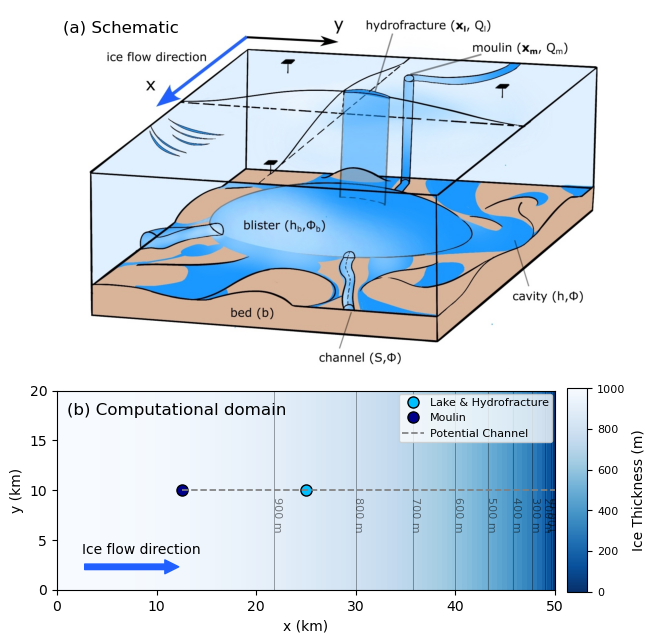

In [1]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.patches import FancyArrowPatch  # new import

# Use the same domain and feature locations from the 3D plot
Lx, Ly = 50, 20
x_m, y_m = 12.5, 10.0
x_l, y_l = 0.5 * Lx, 0.5 * Ly 
r_lake = 0.5  # Radius of the lake depression
rad_moulin = 0.25 # Radius of the moulin
# Create a mesh for x and y coordinates
x = np.linspace(0, Lx, 100)
y = np.linspace(0, Ly, 50)
X, Y = np.meshgrid(x, y)
H = np.sqrt(1 - (X / Lx) ** 2) * 1000  # Parabolic thickness profile

# 读取图片并计算原始长宽比（height/width）
img = plt.imread('Schematic.jpg')
h_img, w_img, _ = img.shape
aspect_img = h_img / w_img

# 定义一个合适的 figure 大小（inch），宽高比例由你自己决定
fig_w, fig_h = 6, 6
fig = plt.figure(figsize=(fig_w, fig_h))
# 计算图片在 figure 中的高度占比
h_frac = (fig_w / fig_h) * aspect_img
# 防止超过 1
h_frac = min(h_frac, 1.0)

# Panel (a)：图片区域
# [left, bottom, width, height]，bottom = 1 - h_frac 让它贴在顶部
ax1 = fig.add_axes([0, 1 - h_frac, 1, h_frac])
ax1.imshow(img, aspect='auto')  
ax1.text(0.01, 0.95, '(a) Schematic', fontsize=12, ha='left', va='center', transform=ax1.transAxes)
ax1.axis('off')

# Panel (b)：下面剩余区域
ax2 = fig.add_axes([0, 0, 1, 1 - h_frac])
c = ax2.pcolormesh(X, Y, H, cmap='Blues_r', shading='auto')
c.set_clim(0, 1000)  # Set color limits for the colormap
cb = plt.colorbar(
    c,
    ax=ax2,
    label='Ice Thickness (m)',
    shrink=0.85,
    pad=0.02,
    aspect=10  # decrease aspect to make the bar wider
)
cb.ax.tick_params(labelsize=8)

# contours
contour_lines = ax2.contour(X, Y, H, '-', levels=np.arange(100, 901, 100), colors='k', linewidths=0.5, alpha=0.5)
# 只调整等高线标签的 y 坐标，使其位于中间偏下
labels = ax2.clabel(contour_lines, inline=False, fontsize=8, fmt='%d m')
for label in labels:
    label.set_position((label.get_position()[0]+0.25, 7.5))  # Adjust y position
    bbox = label.get_bbox_patch()
    # style the box (optional)
    # bbox.set_boxstyle("round,pad=0.1")
    # bbox.set_facecolor("white")
    # bbox.set_edgecolor("none")
    # bbox.set_alpha(0.5)

lake = ax2.plot([x_l], [y_l], 'o', color='deepskyblue', markersize=8, label='Lake & Hydrofracture', markeredgecolor='black')
moulin = ax2.plot([x_m], [y_m], 'o', color='darkblue', markersize=8, label='Moulin', markeredgecolor='black')
ax2.plot([x_m, Lx], [y_m, y_m], '--', color='gray', linewidth=1.25, label='Potential Channel')

# 5. Set plot limits, labels, and title
ax2.set_xlim(0, Lx)
ax2.set_ylim(0*Ly, Ly)
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')
ax2.text(0.02, 0.9, '(b) Computational domain', fontsize=12, ha='left', va='center', transform=ax2.transAxes)
ax2.set_aspect('equal', adjustable='box')
ax2.grid(False)
ax2.legend(
    loc='upper right',
    fontsize=8,
    bbox_to_anchor=(1.005, 1.01),
    bbox_transform=ax2.transAxes,
    labelspacing=0.5,
    handletextpad=0.5,
    borderpad=0.3,
    numpoints=1  # Show only one point for scatter plots in the legend
)
# add an arrow patch
arrow1 = FancyArrowPatch(
    (2.5, 2.3), (12.5, 2.3),   # start -> end
    arrowstyle='simple',
    mutation_scale=20,         # size of the arrow head
    linewidth=1.0,
    color="#2160FF"
)
ax2.add_patch(arrow1)
ax2.text(0.05, 0.2, 'Ice flow direction', fontsize=10, ha='left', va='center', transform=ax2.transAxes)

# plt.show()
# save the figure
plt.savefig('./figures/Fig1_schematic.png', transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=600)